In [ ]:
import pandas as pd

df = pd.read_csv("/content/health_prediction.csv")
print(df.shape)


(20707, 31)


In [ ]:
features = [
    "obesity_women",
    "tobacco_avg",
    "alcohol_avg",
    "anaemia_women",
    "insurance_coverage",
    "lifestyle_risk",
    "nutrition_risk",
    "access_risk",
    "lifestyle_access_interaction",
    "nutrition_access_interaction",
    "obesity_level",
    "anaemia_level",
    "insurance_level"
]

X = df[features]


In [ ]:
labels = {
    "Diabetes Risk": "diabetes_risk_encoded",
    "Hypertension Risk": "hypertension_risk_encoded",
    "BP Risk": "bp_risk_encoded",
    "Cardio Risk": "cardio_risk_encoded"
}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



================ DIABETES RISK =================
Accuracy: 0.9488169966199903
Macro F1-score: 0.8862447190574553
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       319
           1       0.96      0.77      0.85       445
           2       0.95      0.99      0.97      3378

    accuracy                           0.95      4142
   macro avg       0.95      0.84      0.89      4142
weighted avg       0.95      0.95      0.95      4142



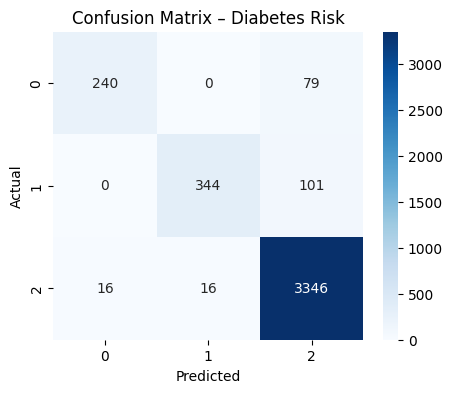


================ HYPERTENSION RISK =================
Accuracy: 0.9509898599710285
Macro F1-score: 0.8103691911877121
              precision    recall  f1-score   support

           0       0.98      0.42      0.59       140
           1       0.99      0.78      0.87       519
           2       0.95      1.00      0.97      3483

    accuracy                           0.95      4142
   macro avg       0.97      0.73      0.81      4142
weighted avg       0.95      0.95      0.95      4142



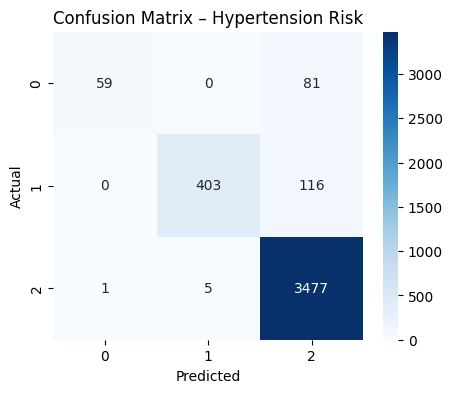


================ BP RISK =================
Accuracy: 0.9618541767262192
Macro F1-score: 0.7055427694036113
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        18
           1       0.97      0.92      0.94      1309
           2       0.96      0.99      0.97      2815

    accuracy                           0.96      4142
   macro avg       0.98      0.67      0.71      4142
weighted avg       0.96      0.96      0.96      4142



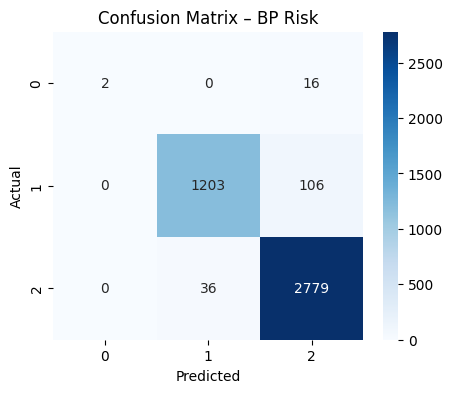


================ CARDIO RISK =================
Accuracy: 0.9524384355383873
Macro F1-score: 0.7733899088807851
              precision    recall  f1-score   support

           0       1.00      0.28      0.43        18
           1       0.95      0.89      0.92      1166
           2       0.95      0.98      0.97      2958

    accuracy                           0.95      4142
   macro avg       0.97      0.72      0.77      4142
weighted avg       0.95      0.95      0.95      4142



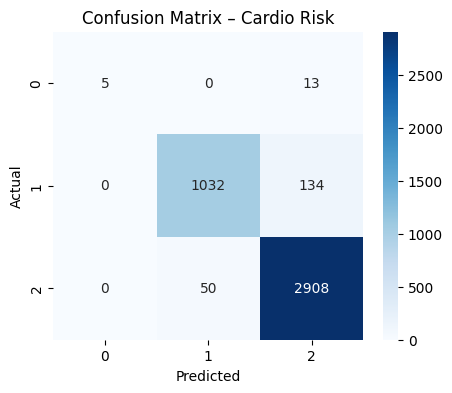

In [ ]:
models = {}

for name, target in labels.items():
    print(f"\n================ {name.upper()} =================")

    y = df[target]


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )


    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=8,
        min_samples_leaf=10,
        random_state=42
    )


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")

    print("Accuracy:", acc)
    print("Macro F1-score:", f1)
    print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    models[name] = model


In [ ]:
from sklearn.model_selection import cross_val_score

for name, target in labels.items():
    scores = cross_val_score(
        models[name],
        X,
        df[target],
        cv=5,
        scoring="f1_macro"
    )
    print(f"{name} CV Macro F1:", scores.mean())


Diabetes Risk CV Macro F1: 0.8885487470884504
Hypertension Risk CV Macro F1: 0.817393307017101
BP Risk CV Macro F1: 0.6704667584063588
Cardio Risk CV Macro F1: 0.7281873741650512


In [ ]:
import joblib

for name, model in models.items():
    filename = name.lower().replace(" ", "_") + "_model.pkl"
    joblib.dump(model, filename)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/health_prediction.csv")

risk_map = {0: "Low", 1: "Medium", 2: "High"}


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/health_prediction.csv")

risk_map = {0: "Low", 1: "Medium", 2: "High"}
df["risk_label"] = df["risk_encoded"].map(risk_map)


/tmp/ipython-input-1608165845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes_risk_label", data=df, palette="viridis")


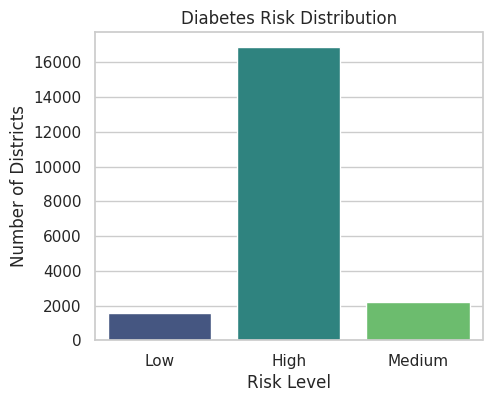

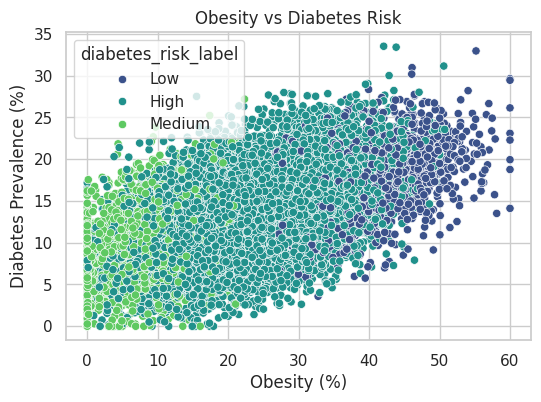

In [50]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="obesity_women",
    y="diabetes_avg",
    hue="diabetes_risk_label",
    data=df,
    palette="viridis"
)
plt.title("Obesity vs Diabetes Risk")
plt.xlabel("Obesity (%)")
plt.ylabel("Diabetes Prevalence (%)")
plt.show()


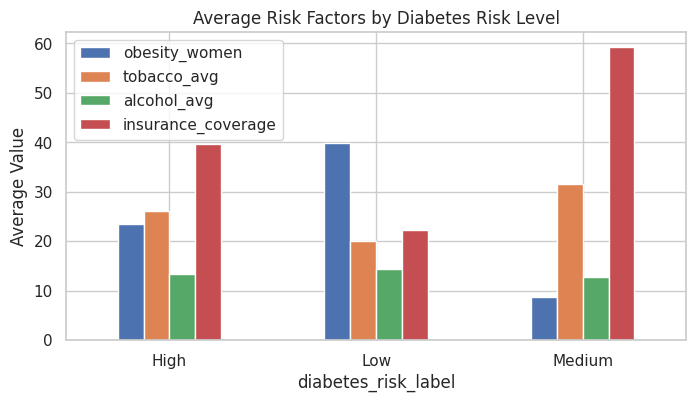

In [51]:
summary = df.groupby("diabetes_risk_label")[[
    "obesity_women",
    "tobacco_avg",
    "alcohol_avg",
    "insurance_coverage"
]].mean()

summary.plot(kind="bar", figsize=(8,4))
plt.title("Average Risk Factors by Diabetes Risk Level")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()


In [52]:
def visualize_model(
    df,
    model,
    disease_name,
    risk_col,
    x_feature,
    y_feature
):
    df[f"{disease_name}_label"] = df[risk_col].map(risk_map)


    plt.figure(figsize=(5,4))
    sns.countplot(x=f"{disease_name}_label", data=df)
    plt.title(f"{disease_name} Risk Distribution")
    plt.show()


    importance = pd.Series(
        model.feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(8,4))
    importance.plot(kind="bar")
    plt.title(f"Feature Importance – {disease_name}")
    plt.show()


    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=x_feature,
        y=y_feature,
        hue=f"{disease_name}_label",
        data=df
    )
    plt.title(f"{disease_name}: Risk vs {x_feature}")
    plt.show()


    summary = df.groupby(f"{disease_name}_label")[[
        "obesity_women",
        "tobacco_avg",
        "alcohol_avg",
        "insurance_coverage"
    ]].mean()

    summary.plot(kind="bar", figsize=(8,4))
    plt.title(f"Preventive Insight – {disease_name}")
    plt.show()


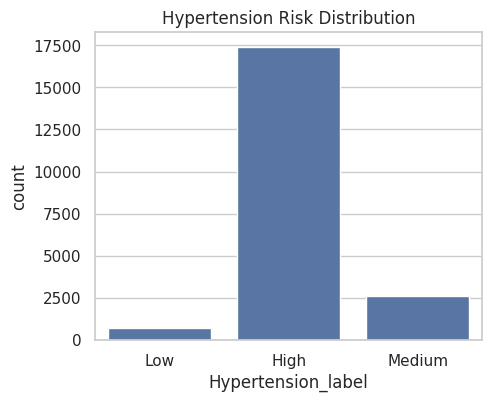

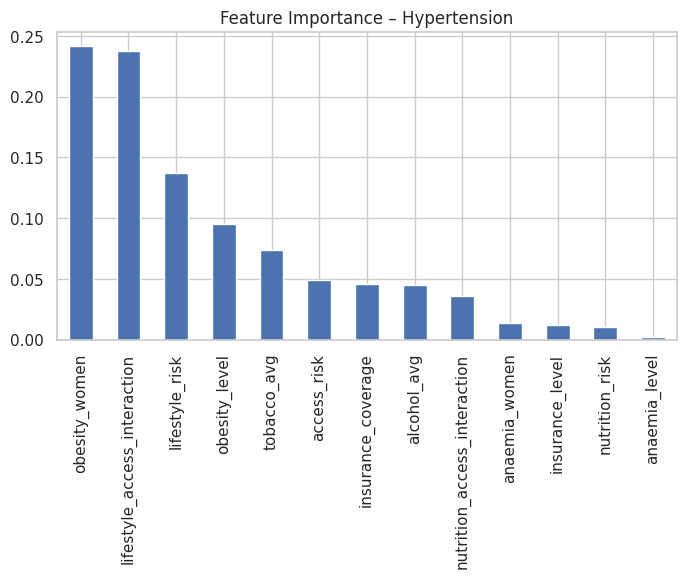

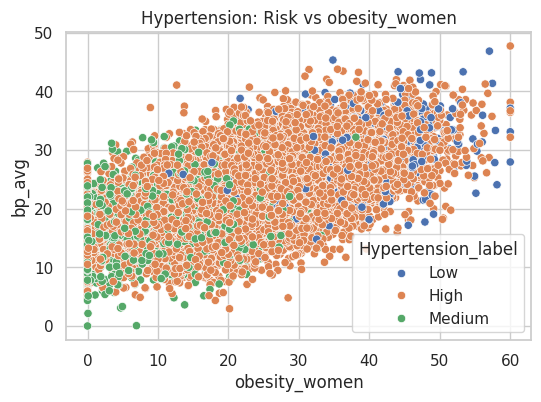

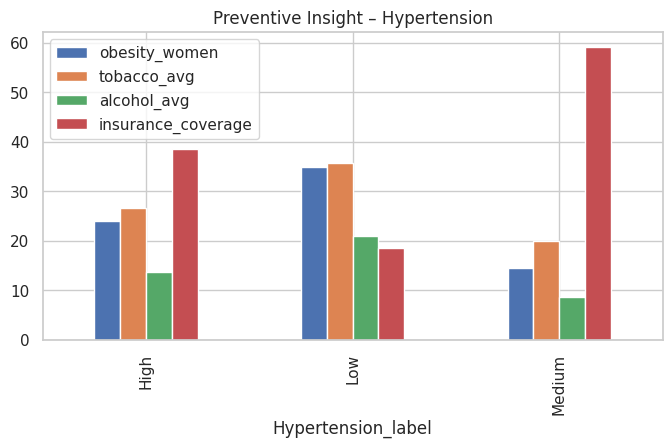

In [53]:
visualize_model(
    df=df,
    model=models["Hypertension Risk"],
    disease_name="Hypertension",
    risk_col="hypertension_risk_encoded",
    x_feature="obesity_women",
    y_feature="bp_avg"
)


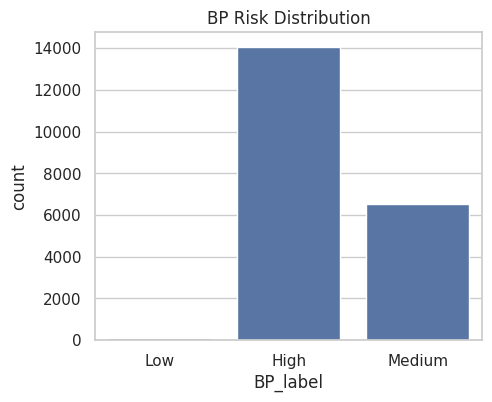

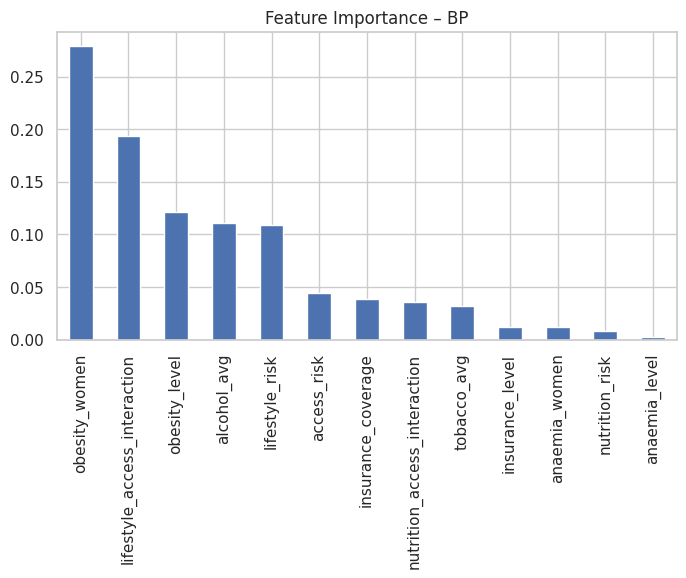

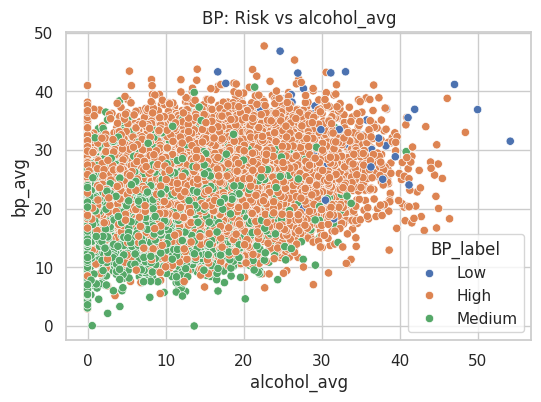

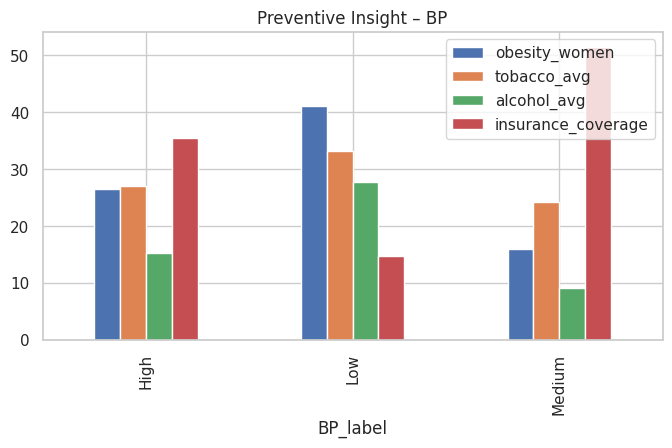

In [54]:
visualize_model(
    df=df,
    model=models["BP Risk"],
    disease_name="BP",
    risk_col="bp_risk_encoded",
    x_feature="alcohol_avg",
    y_feature="bp_avg"
)


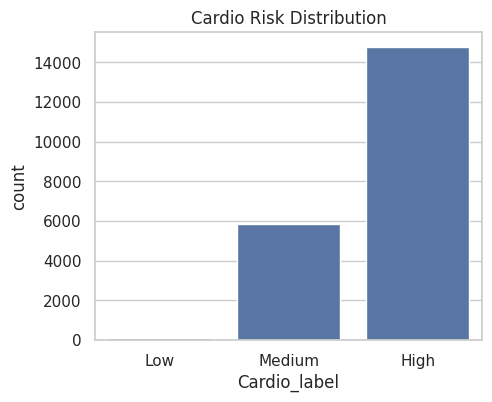

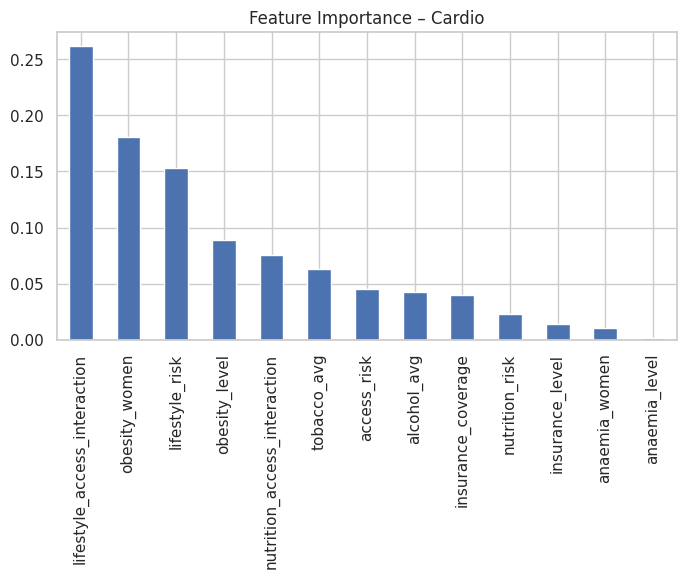

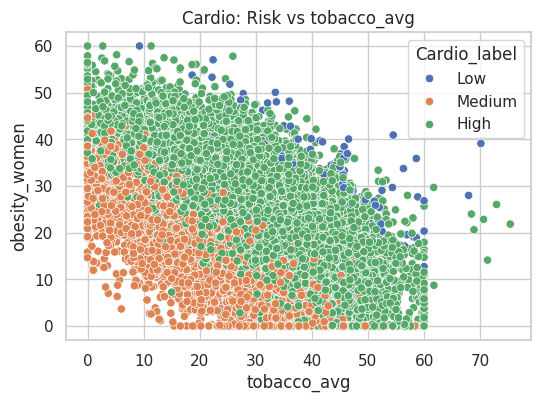

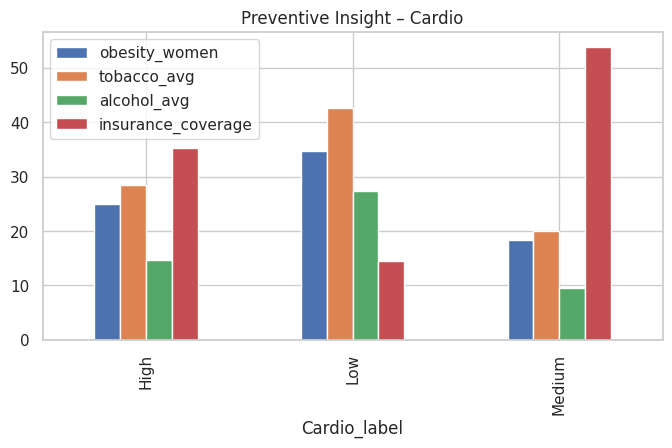

In [55]:
visualize_model(
    df=df,
    model=models["Cardio Risk"],
    disease_name="Cardio",
    risk_col="cardio_risk_encoded",
    x_feature="tobacco_avg",
    y_feature="obesity_women"
)
